# Constrained Optimization
## Analytical and numerical approaches


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.optimize import minimize

from mpl_toolkits.mplot3d import *
from matplotlib import cm
from ipywidgets import interact

### Consumer's optimization problem:

$$\max_{x_0,x_1} U(x_0,x_1) $$

subject to a budget constraint

$$p x_0 + x_1 \leq I $$

where $p=\frac{p_{0}}{p_{1}}$

Let's make some parameter assumptions for the default examples and diagrams below.

In [2]:
alpha = 0.6
p = 1
I = 100

Now define the utility function and budget constraint

In [36]:
# useful for plots and calculations
def budgetc(c0,p,I):
    '''c1 as a function of c0 along budget line'''
    return I - p*c0

def U(c, a=alpha):
    '''Utility at c=(c[0], c[1])'''
    return (c[0]**a)*(c[1]**(1-a))

def MU0(c, a=alpha):
    '''MU of Cobb-Douglas'''
    return  a*U(c,a)/c[0] 

def MU1(c, a=alpha):
    return  (1-a)*U(c,a)/c[1]

def indif(c0, ubar, a=alpha):
    '''c1 as function of c0, implicitly defined by U(c0, c1) = ubar'''
    return (ubar/(c0**a))**(1/(1-a))

In [4]:
def acopt(p,I,a =alpha):
    '''Analytic solution for interior optimum'''
    c0 = a * I/p
    c1 = (1-a)*I
    c = [c0,c1]
    uopt = U(c,a)
    return c, uopt

In [29]:
pmin, pmax = 1, 4
Imin, Imax = 10, 200
cmax = (3/4)*Imax/pmin
c0 = np.linspace(0.1,cmax,num=100)

In [50]:
def consume_plot(p, I, a=alpha):
    ce, uebar = acopt(p, I, a)
    fig, ax = plt.subplots(figsize=(9,9))
    ax.plot(c0, budgetc(c0, p, I), lw=2.5)
    ax.fill_between(c0, budgetc(c0, p, I), alpha = 0.2)
    ax.plot(c0, indif(c0, uebar, a), lw=2.5)
    ax.vlines(ce[0],0,ce[1], linestyles="dashed")
    ax.hlines(ce[1],0,ce[0], linestyles="dashed")
    ax.plot(ce[0],ce[1],'ob')
    ax.set_xlim(0, cmax)
    ax.set_ylim(0, cmax)
    ax.set_xlabel(r'$c_0$', fontsize=16)
    ax.set_ylabel('$c_1$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()

Cobb-Douglas utility:  $U(c_0,c_1) = c_0^a \cdot c_1^{1-a}$

In [51]:
interact(consume_plot, p=(0.5,2,0.1), I=(50,150,10), a=(0.1,0.9,0.1));

In [52]:
c0 = np.linspace(0.1,cmax,num=100)
def arb_plot(c0g):
    cg = [c0g,I-c0g]
    '''Display characteristics of a guess along the constraint'''
    fig, ax = plt.subplots(figsize=(9,9))
    ax.plot(c0, budgetc(c0, p, I), lw=1)
    ax.fill_between(c0, budgetc(c0, p, I), alpha = 0.2)
    ax.plot(c0, indif(c0, U(cg)), lw=2.5)
    ax.vlines(cg[0],0,cg[1], linestyles="dashed")
    ax.hlines(cg[1],0,cg[0], linestyles="dashed")
    ax.plot(cg[0],cg[1],'ob')
    mu0pd, mu1pd = MU0(cg), MU1(cg)/p
    if mu0pd > mu1pd:
        inq = r'$>$'
    elif mu0pd < mu1pd:
        inq = r'$<$'
    else:
        inq =r'$=$'
    ax.text(60, 120, r'$\frac{MU_0}{p_0}$'+inq+r'$\frac{MU_1}{p_1}$',fontsize=20)
    utext = r'$({:5.1f}, {:5.1f}) \ \ U={:5.3f}$'.format(cg[0], cg[1], U(cg))
    ax.text(60, 100, utext, fontsize=12)
    ax.set_xlim(0, cmax)
    ax.set_ylim(0, cmax)
    ax.set_xlabel(r'$c_0$', fontsize=16)
    ax.set_ylabel('$c_1$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title('The No-Arbitrage argument')
    plt.show()

## The 'no-arbitrage' argument 

In [53]:
interact(arb_plot, c0g=(1,I,0.1));

In [11]:
def consume_plot(c0, p, I, a=alpha):
    c0 = np.linspace(0.1,cmax,num=100)
    ce, uebar = find_opt(p, I, a)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(c0, budgetc(c0, p, I), lw=2.5)
    ax.plot(c0, indif(c0, uebar, a), lw=2.5)
    ax.vlines(ce[0],0,ce[1], linestyles="dashed")
    ax.hlines(ce[1],0,ce[0], linestyles="dashed")
    ax.plot(ce[0],ce[1],'ob')
    ax.set_xlim(0, cmax)
    ax.set_ylim(0, cmax)
    ax.set_xlabel(r'$c_1$', fontsize=16)
    ax.set_ylabel('$c_2$', fontsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()

In [12]:
levels = np.arange(0,60,12)   # if want to specify levels=levels option in contour

In [54]:
def consplot3d():
    fig= plt.figure(figsize=(9,9))
    x0 = np.linspace(0.1, 100, 1000)
    x1 = np.copy(x0)
    X0, X1 = np.meshgrid(x0, x1)
    Z = U(np.vstack([X0.ravel(), X1.ravel()])).reshape((1000,1000))
    levels = np.arange(0,60,12)   # if want to specify contour level values
    
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X0, X1, Z, cmap=cm.coolwarm);    # plot a 3d surface plot
    ax1.plot(x0,I-p*x0, '--k')
    ax1.set_xlabel('x0')
    ax1.set_ylabel('x1')
    ax1.set_zlabel('U(x0,x1)');
    ax1.contour(X0,X1,Z, offset=1);  # contour lines projected on U=0 plane 
    #ax.view_init(elev =25, azim = -95)   #to change view angle
    
    ax2 = fig.add_subplot(122, aspect='equal')
    ax2.contour(X0, X1, Z)
    ax2.plot(x0,I - p*x0)
    #ax2.xlabel(r'$x_0$'); plt.ylabel(r'$x_1$')
    #ax2.title('Consumer Optimization')
    ax2.fill_between(x0, I - p*x0, alpha = 0.2);

    plt.savefig('utility3d.jpg')
    

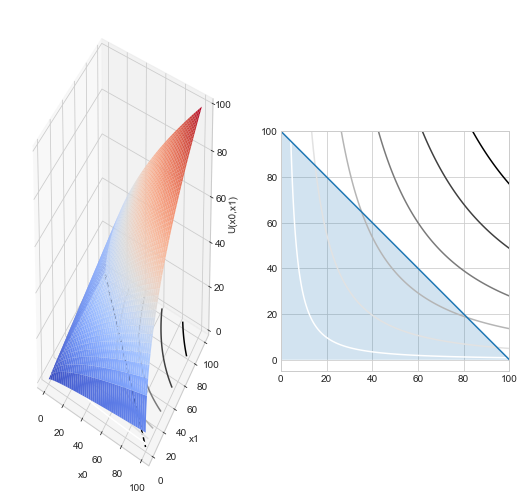

In [55]:
consplot3d()

# Numerical constrained optimization

In [60]:
from scipy.optimize import minimize

def budget(x):
    return np.array([p*x[0] + x[1] - I])

budgetc = ({'type': 'eq', 'fun' : budget })

In [61]:
def negU(x):
    return -U(x)

In [62]:
x = np.array([I/2, I/2])  # initial guess
x, U(x)

(array([ 50.,  50.]), 50.0)

In [63]:
ux = minimize(negU, x, constraints = budgetc)
ux

     fun: -51.01698002500743
     jac: array([-0.51017046, -0.51016903])
 message: 'Optimization terminated successfully.'
    nfev: 28
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([ 59.99995227,  40.00004773])

In [68]:
ce = ux.x

In [19]:
def indif(ubar):
    '''Returns an indifference curve function x1
       U(x0,x1) = ubar
    '''
    def x1ic(x0, a=alpha):
        return np.power(ubar/np.power(x0,a), 1/(1-a))
    return x1ic
    

Function factory: function `indif` returns a *function* of x0. that we later use to graph indifference. 

In [20]:
def isocost(x0):
    return I - p*x0